# Classificação

A documentação necessário das ferramentas usadas podem ser vistitadas em:

- [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/tree.html#tree-classification)
- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- [SVM-SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)
- [Train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)


## Importar conjunto de dados

In [30]:
import pandas as pd
dataframe = pd.read_csv('datasets/winequality-white.csv', sep=';')

print(dataframe.shape)
print(dataframe.describe())


(4898, 12)
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.0000

## Distribuição das classes

[6 5 7 8 4 3 9]
quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
dtype: int64


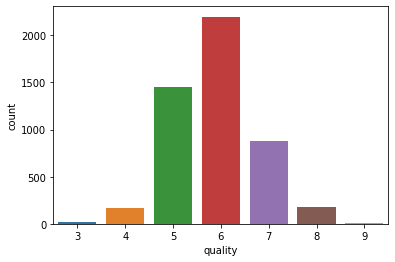

In [18]:
import  matplotlib.pyplot as plt
import seaborn as sns

print(dataframe['quality'].unique())
print(dataframe.groupby('quality').size())

sns.countplot(dataframe['quality'], label='Quantidade')
plt.show()


## Distribuição dos atributos

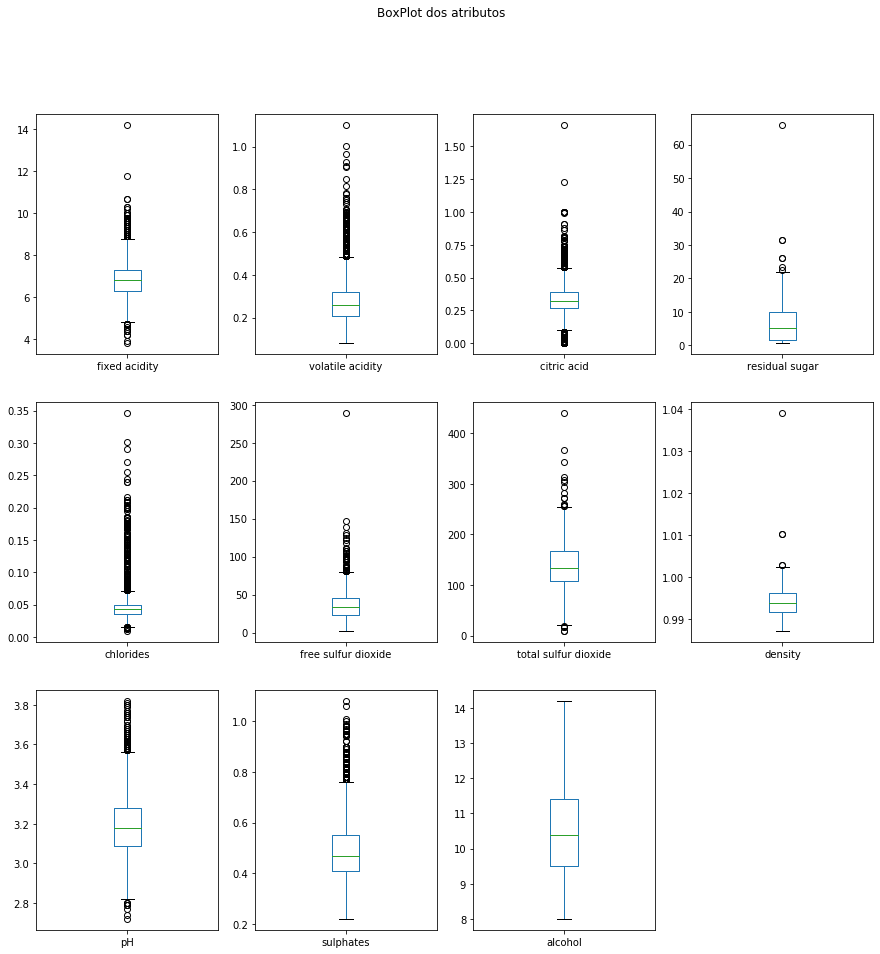

In [21]:
dataframe.drop('quality', axis=1).plot(kind='box', subplots=True, layout=(3,4), sharex=False, figsize=(15,15), title='BoxPlot dos atributos')
plt.show()


## Histograma dos atributos

Text(0.5, 0.98, 'Histograma para cada atributo de entrada')

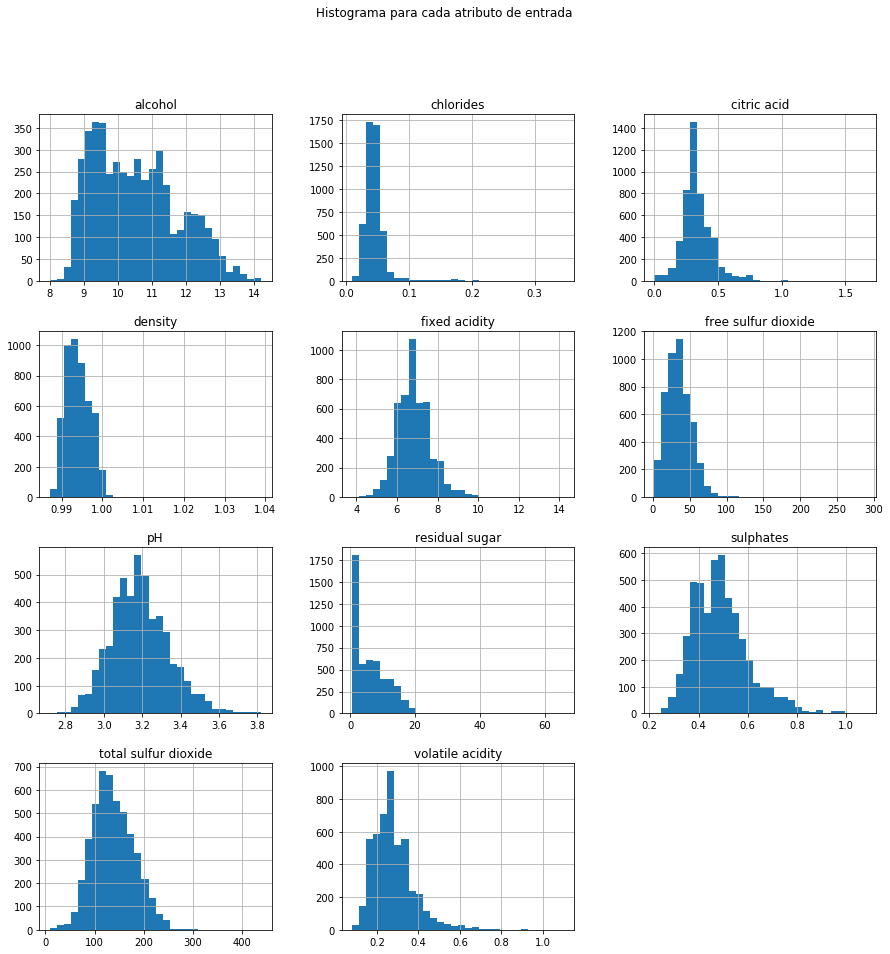

In [22]:
import pylab as pl
dataframe.drop('quality', axis=1).hist(bins=30, figsize=(15,15))
pl.suptitle("Histograma para cada atributo de entrada")


## Normalização dos dados

In [31]:
from sklearn.preprocessing import MinMaxScaler

y = dataframe['quality']
X = dataframe.drop('quality', axis=1)

scaler = MinMaxScaler(feature_range=(0, 1))

X = scaler.fit_transform(X)


## Data splicing

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123)


## Treinando o algoritmo
### Regressão Logística

In [46]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_lr.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_lr.score(X_test, y_test))


Acuracia no conjunto de treino:  0.530146528945472
Acuracia no conjunto de teste:  0.563265306122449


/home/gauss/rsestevam/PycharmProjects/ai_brasil/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gauss/rsestevam/PycharmProjects/ai_brasil/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf_dtc = DecisionTreeClassifier()
clf_dtc.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_dtc.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_dtc.score(X_test, y_test))


### Floresta Aleátorias de Árvore de Decisão

In [49]:
from sklearn.ensemble import RandomForestClassifier

clf_rfc = RandomForestClassifier()
clf_rfc.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_rfc.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_rfc.score(X_test, y_test))



Acuracia no conjunto de treino:  0.9870285851549363
Acuracia no conjunto de teste:  0.673469387755102


/home/gauss/rsestevam/PycharmProjects/ai_brasil/venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_knn.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_knn.score(X_test, y_test))



### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_nb.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_nb.score(X_test, y_test))


Acuracia no conjunto de treino:  0.4435936702399183
Acuracia no conjunto de teste:  0.4418367346938776


### Support Vector Machine

In [43]:
from sklearn.svm import SVC

clf_svc = SVC()
clf_svc.fit(X_train, y_train)

print("Acuracia no conjunto de treino: ", clf_svc.score(X_train, y_train))
print("Acuracia no conjunto de teste: ", clf_svc.score(X_test, y_test))


/home/gauss/rsestevam/PycharmProjects/ai_brasil/venv/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Acuracia no conjunto de treino:  0.5099540581929556
Acuracia no conjunto de teste:  0.5428571428571428


## Avaliação do Modelo

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = clf_rfc.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  0   0   1   1   0   0   0]
 [  0   4  12   5   0   0   0]
 [  0   4 152  49   1   0   0]
 [  0   5  61 265  21   2   0]
 [  0   0   7  45  66   3   0]
 [  0   0   0  14   7   8   0]
 [  0   0   1   0   1   0   0]]
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.31      0.19      0.24        21
           5       0.65      0.74      0.69       206
           6       0.70      0.75      0.72       354
           7       0.69      0.55      0.61       121
           8       0.62      0.28      0.38        29
           9       0.00      0.00      0.00         2

    accuracy                           0.67       735
   macro avg       0.42      0.36      0.38       735
weighted avg       0.67      0.67      0.66       735



/home/gauss/rsestevam/PycharmProjects/ai_brasil/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
